QUANTUM CLASE 08/10/2024: HACER KERNEL DE SUPORT VECTOR MACHINES (SVM) A MANO.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()

# Convertir a DataFrame para mayor flexibilidad
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df = df[['sepal length (cm)', 'sepal width (cm)', 'target']]

# Eliminar una de las clases (por ejemplo, la clase con target == 2)
df = df[df['target'] != 2]

# Separar características (X) y etiquetas (y)
X = df.drop('target', axis=1)
y = df['target']

# Dividir en conjuntos de entrenamiento y prueba (80% para entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 2 * np.pi))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Imprimir la forma de los conjuntos
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')
print(f'Tamaño de las etiquetas de entrenamiento: {y_train.shape}')
print(f'Tamaño de las etiquetas de prueba: {y_test.shape}')

Tamaño del conjunto de entrenamiento: (80, 2)
Tamaño del conjunto de prueba: (20, 2)
Tamaño de las etiquetas de entrenamiento: (80,)
Tamaño de las etiquetas de prueba: (20,)


In [3]:
import numpy as np

def kernel_lineal(X):
    # Convertir el DataFrame a un array de NumPy si es necesario
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # Obtener el número de muestras
    n = X.shape[0]
    
    # Inicializar la matriz del kernel con ceros
    K = np.zeros((n, n))
    
    # Calcular el kernel lineal
    for i in range(n):
        for j in range(n):
            K[i, j] = np.dot(X[i, :], X[j, :])  # Producto escalar entre las filas i y j
    
    return K

# Suponiendo que X_train es un DataFrame de pandas
kernel_l = np.array(kernel_lineal(X_train))
print(kernel_l)

[[15.00071561 15.33917941 12.98347136 ... 22.33861078 14.66225181
  22.50107341]
 [15.33917941 16.00595309 14.52348165 ... 24.26785444 14.67240572
  23.00876911]
 [12.98347136 14.52348165 16.0871844  ... 24.87708928 11.44346107
  19.47520704]
 ...
 [22.33861078 24.26785444 24.87708928 ... 39.60026457 20.40936713
  33.50791618]
 [14.66225181 14.67240572 11.44346107 ... 20.40936713 14.65209789
  21.99337771]
 [22.50107341 23.00876911 19.47520704 ... 33.50791618 21.99337771
  33.75161011]]


LO siguiente se hizo en la clase del 15/10/2024:

KERNEL POLINOMICO:

In [4]:
import numpy as np

def kernel_polinomico(X, c=1, d=2):
    """
    Kernel polinómico de segundo grado: K(x_i, x_j) = (x_i · x_j + c)^d
    :param X: Matriz de entrada de datos (puede ser un DataFrame o un array de NumPy).
    :param c: Constante de desplazamiento (por defecto es 1).
    :param d: Grado del polinomio (por defecto es 2).
    :return: Matriz del kernel polinómico.
    """
    # Convertir el DataFrame a un array de NumPy si es necesario
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # Obtener el número de muestras
    n = X.shape[0]
    
    # Inicializar la matriz del kernel con ceros
    K = np.zeros((n, n))
    
    # Calcular el kernel polinómico
    for i in range(n):
        for j in range(n):
            K[i, j] = (np.dot(X[i, :], X[j, :]) + c) ** d  # Kernel polinómico de segundo grado
    
    return K

# Suponiendo que X_train es un DataFrame de pandas
kernel_p = np.array(kernel_polinomico(X_train))
print(kernel_p)

[[ 256.02289989  266.96878364  195.53747125 ...  544.69075334
   245.30613163  552.30045134]
 [ 266.96878364  289.20244053  240.97848247 ...  638.46446815
   245.62430104  576.42099408]
 [ 195.53747125  240.97848247  291.97187081 ...  669.62374974
   154.8397234   419.23410326]
 ...
 [ 544.69075334  638.46446815  669.62374974 ... 1648.38148334
   458.36100072 1190.79627885]
 [ 245.30613163  245.62430104  154.8397234  ...  458.36100072
   244.98816841  528.69541845]
 [ 552.30045134  576.42099408  419.23410326 ... 1190.79627885
   528.69541845 1207.6744054 ]]


APLICACIÓN:

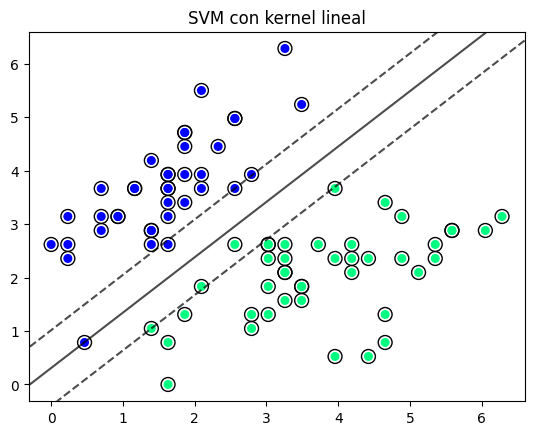

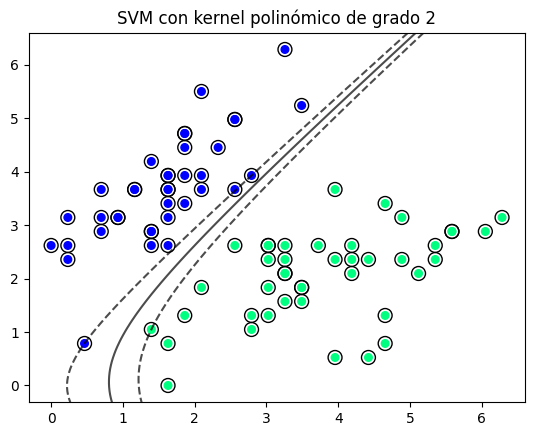

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

def kernel_lineal(X, Y):
    """
    Kernel lineal: K(x_i, x_j) = x_i · x_j
    :param X: Matriz de entrada de datos X (lista de listas).
    :param Y: Matriz de entrada de datos Y (lista de listas).
    :return: Matriz del kernel lineal.
    """
    # Inicializar la matriz del kernel lineal
    kernel_matrix = []

    # Recorrer cada fila de X
    for x in X:
        row_result = []
        # Recorrer cada fila de Y
        for y in Y:
            # Calcular el producto ESCALAR punto entre x e y
            dot_product = 0
            for x_i, y_i in zip(x, y):
                dot_product += x_i * y_i
            row_result.append(dot_product)
        kernel_matrix.append(row_result)

    return np.array(kernel_matrix)

def kernel_polinomico(X, Y, c=1, d=2):
    """
    Kernel polinómico de segundo grado: K(x_i, x_j) = (x_i · x_j + c)^d
    :param X: Matriz de entrada de datos X (lista de listas).
    :param Y: Matriz de entrada de datos Y (lista de listas).
    :param c: Constante de desplazamiento (por defecto es 1).
    :param d: Grado del polinomio (por defecto es 2).
    :return: Matriz del kernel polinómico.
    """
    # Inicializar la matriz del kernel polinómico
    kernel_matrix = []

    # Recorrer cada fila de X
    for x in X:
        row_result = []
        # Recorrer cada fila de Y
        for y in Y:
            # Calcular el producto ESCALAR punto entre x e y
            dot_product = 0
            for x_i, y_i in zip(x, y):
                dot_product += x_i * y_i
            # Aplicar la fórmula del kernel polinómico
            polynomial_result = (dot_product + c) ** d
            row_result.append(polynomial_result)
        kernel_matrix.append(row_result)

    return np.array(kernel_matrix)

# Precomputar los kernels
kernel_l = kernel_lineal(X_train, X_train)
kernel_p = kernel_polinomico(X_train, X_train)

# Entrenar SVM con kernel lineal precomputado
svm_lineal = svm.SVC(kernel='precomputed')
svm_lineal.fit(kernel_l, y_train[:100])

# Entrenar SVM con kernel polinómico precomputado
svm_polinomico = svm.SVC(kernel='precomputed')
svm_polinomico.fit(kernel_p, y_train[:100])

# Función para graficar la clasificación
def graficar_clasificacion(modelo, X, y, titulo, kernel_fn):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=30)
    
    # Crear una malla para el contorno
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    
    # Precomputar el kernel para la malla
    X_mesh = np.c_[xx.ravel(), yy.ravel()]
    kernel_mesh = kernel_fn(X_mesh, X)
    
    Z = modelo.decision_function(kernel_mesh)
    Z = Z.reshape(xx.shape)

    # Dibujar el contorno y los márgenes
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
               linestyles=['--', '-', '--'])

    # Dibujar los vectores soporte
    ax.scatter(X[:, 0], X[:, 1], s=100, linewidth=1,
               facecolors='none', edgecolors='k')

    plt.title(titulo)
    plt.show()

# Graficar la clasificación para el kernel lineal
graficar_clasificacion(svm_lineal, X_train, y_train[:100], "SVM con kernel lineal", kernel_lineal)

# Graficar la clasificación para el kernel polinómico de segundo grado
graficar_clasificacion(svm_polinomico, X_train, y_train[:100], "SVM con kernel polinómico de grado 2", kernel_polinomico)

DEBERES HACER UNO PERSONALIZADO DE VERDAD.

In [6]:
def transformacion(x):
    # Añadir nuevas coordenadas (dimensiones) al vector original
    # Por ejemplo, añadiendo el cuadrado de cada valor del vector original
    nuevas_coordenadas = []
    for elemento in x:
        nuevas_coordenadas.append(elemento)
        nuevas_coordenadas.append(np.sin(elemento)*np.cos(elemento))
    
    return np.array(nuevas_coordenadas)

x = transformacion(np.array([1, 2, 3]))
print(x)

[ 1.          0.45464871  2.         -0.37840125  3.         -0.13970775]


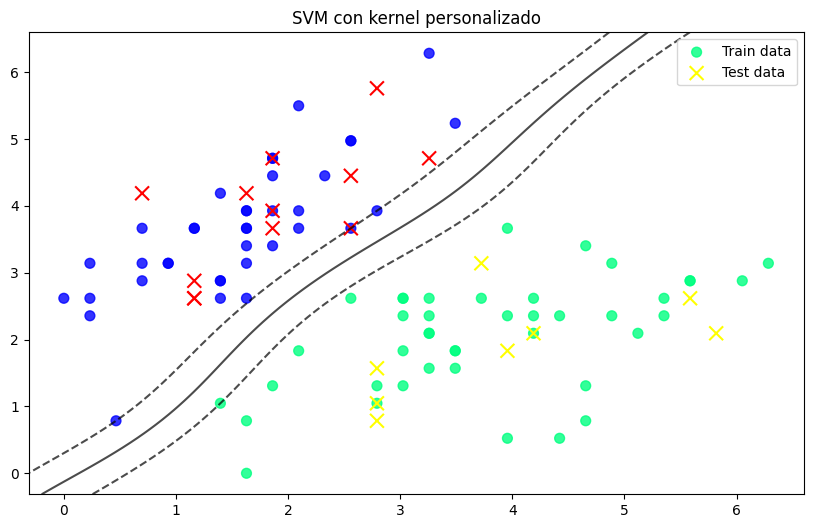

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

def transformacion(x):
    # Añadir nuevas coordenadas (dimensiones) al vector original
    # Por ejemplo, añadiendo el cuadrado de cada valor del vector original
    nuevas_coordenadas = []
    for elemento in x:
        nuevas_coordenadas.append(elemento)
        nuevas_coordenadas.append(np.sin(elemento)*np.cos(elemento))
    
    return np.array(nuevas_coordenadas)

def kernel_personalizado(X, Y):
    # Inicializar la matriz del kernel polinómico
    kernel_matrix = []

    # Recorrer cada fila de X
    for x in X:
        row_result = []
        # Recorrer cada fila de Y
        for y in Y:
            # Calcular el producto ESCALAR punto entre x e y
            dot_product = 0
            
            for x_i, y_i in zip(transformacion(x), transformacion(y)):
                dot_product += x_i * y_i
            row_result.append(dot_product)
        kernel_matrix.append(row_result)

    return np.array(kernel_matrix)

# Precomputar los kernels
kernel_pers = kernel_personalizado(X_train, X_train)

# Entrenar SVM con kernel personalizado precomputado
svm_personalizado = svm.SVC(kernel='precomputed', C=100)
svm_personalizado.fit(kernel_pers, y_train[:100])

# Función para graficar la clasificación
def graficar_clasificacion(modelo, X, y, X_test, y_test, titulo, kernel_fn):
    plt.figure(figsize=(10, 6))
    
    # Graficar puntos de entrenamiento
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=50, label='Train data', alpha=0.8)
    
    # Graficar puntos de prueba con marcadores distintos (x) y colores diferentes
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='autumn', s=100, marker='x', label='Test data')

    # Crear una malla para el contorno de decisión
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    
    # Precomputar el kernel para la malla
    X_mesh = np.c_[xx.ravel(), yy.ravel()]
    kernel_mesh = kernel_fn(X_mesh, X)
    
    Z = modelo.decision_function(kernel_mesh)
    Z = Z.reshape(xx.shape)

    # Dibujar el contorno y los márgenes
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.7, linestyles=['--', '-', '--'])
    
    plt.title(titulo)
    plt.legend()
    plt.show()

# Graficar la clasificación para el kernel personalizado
graficar_clasificacion(svm_personalizado, X_train, y_train[:100], X_test, y_test[:100], "SVM con kernel personalizado", kernel_personalizado)

**HACER KERNEL PERSONALIZADO CUÁNTICO EN EL QUE SE TRANSFORMEN LOS VECTORES METIÉNDO LAS COORDEANDAS DEL VECTOR EN UN CIRCUITO CÓMO ÁNGULOS DE PUERTAS CUÁNTICAS DE ROTACIÓN Y CREANDO ENTRELAZAMIENTO, LUEGO SACAR EL STATE VECTOR Y ESE ES EL VECTOR TRANSFORMADO**

In [8]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
def transformacion(x):
    # Determinar el número de qubits necesario a partir de la longitud de x
    num_qubits = len(x)
    
    # Crear un circuito cuántico con num_qubits qubits
    qc = QuantumCircuit(num_qubits)
    
    # Aplicar Hadamard y rotaciones Rz a cada qubit
    for i in range(num_qubits):
        qc.h(i)  # Aplicar Hadamard al qubit i
        qc.rz(x[i], i)  # Aplicar una rotación Rz al qubit i con el ángulo x[i]
    
    # Aplicar puertas CNOT entre pares de qubits adyacentes
    for i in range(num_qubits - 1):
        qc.cx(i, i + 1)  # Aplicar una puerta CNOT entre el qubit i y el qubit i+1

    # Obtener el statevector usando el método correcto
    statevector = Statevector.from_instruction(qc)
    
    return np.array(statevector)

x = transformacion(np.array([1, 2, 3]))
print(x)

[-0.3500152 -4.98934573e-02j  0.35355339-2.77555756e-17j
 -0.14713013+3.21485188e-01j  0.19102571+2.97504920e-01j
  0.35355339+2.77555756e-17j -0.3500152 +4.98934573e-02j
  0.19102571-2.97504920e-01j -0.14713013-3.21485188e-01j]


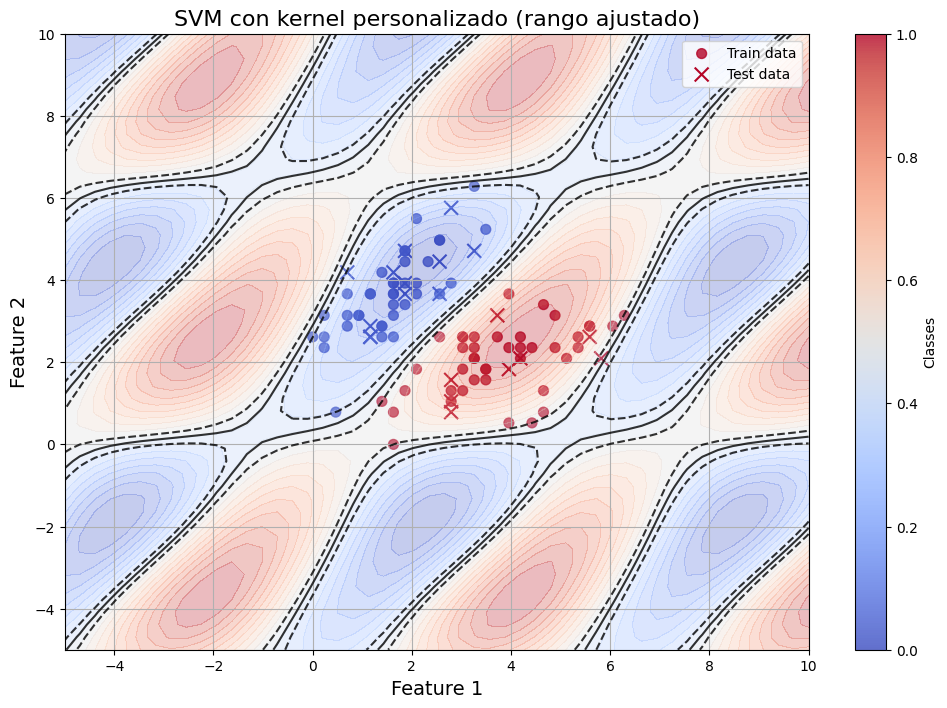

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

def transformacion(x):
    # Determinar el número de qubits necesario a partir de la longitud de x
    num_qubits = len(x)
    
    # Crear un circuito cuántico con num_qubits qubits
    qc = QuantumCircuit(num_qubits)
    
    # Aplicar Hadamard y rotaciones Rz a cada qubit
    for i in range(num_qubits):
        qc.h(i)  # Aplicar Hadamard al qubit i
        qc.rz(x[i], i)  # Aplicar una rotación Rz al qubit i con el ángulo x[i]
    
    # Aplicar puertas CNOT entre pares de qubits adyacentes
    for i in range(num_qubits - 1):
        qc.cx(i, i + 1)  # Aplicar una puerta CNOT entre el qubit i y el qubit i+1

    # Obtener el statevector usando el método correcto
    statevector = Statevector.from_instruction(qc)
    
    return np.array(statevector)

def kernel_personalizado(X, Y):
    # Inicializar la matriz del kernel
    kernel_matrix = np.zeros((X.shape[0], Y.shape[0]))

    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            # Calcular el producto interno entre las transformaciones de x e y
            kernel_matrix[i, j] = np.abs(np.dot(transformacion(X[i]).conj(), transformacion(Y[j]))) ** 2

    return kernel_matrix

# Precomputar los kernels
kernel_pers = kernel_personalizado(X_train, X_train)

# Entrenar SVM con kernel personalizado precomputado
svm_personalizado = svm.SVC(kernel='precomputed', C=100)
svm_personalizado.fit(kernel_pers, y_train[:100])

def graficar_clasificacion(modelo, X, y, X_test, y_test, titulo, kernel_fn):
    plt.figure(figsize=(12, 8))

    # Graficar puntos de entrenamiento
    scatter_train = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, label='Train data', alpha=0.8)

    # Graficar puntos de prueba con marcadores distintos (x) y colores diferentes
    scatter_test = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=100, marker='x', label='Test data')

    # Especificar límites de los ejes X e Y
    x_min, x_max = -5, 10
    y_min, y_max = -5, 10

    # Crear una malla para el contorno de decisión
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))

    # Precomputar el kernel para la malla
    X_mesh = np.c_[xx.ravel(), yy.ravel()]
    kernel_mesh = kernel_fn(X_mesh, X)

    Z = modelo.decision_function(kernel_mesh)
    Z = Z.reshape(xx.shape)

    # Dibujar el contorno y los márgenes
    plt.contourf(xx, yy, Z, alpha=0.3, levels=np.linspace(Z.min(), Z.max(), 20), cmap='coolwarm')
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.8, linestyles=['--', '-', '--'])

    # Mejorar la visualización
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.colorbar(scatter_train, label='Classes')
    plt.title(titulo, fontsize=16)
    plt.xlabel('Feature 1', fontsize=14)
    plt.ylabel('Feature 2', fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

# Graficar la clasificación para el kernel personalizado con límites ajustados
graficar_clasificacion(svm_personalizado, X_train, y_train[:100], X_test, y_test[:100], "SVM con kernel personalizado (rango ajustado)", kernel_personalizado)

In [43]:
# Precomputar los kernels para el conjunto de prueba
kernel_pers_test = kernel_personalizado(X_test, X_train)

# Hacer predicciones
predicciones = svm_personalizado.predict(kernel_pers_test)
print(predicciones)
# Calcular la precisión
precision = np.sum(predicciones == y_test) / len(predicciones)
print("Precisión del modelo:", precision)

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
Precisión del modelo: 1.0


CLASE 29/10/2024: EN VEZ DE TRANSFORMAR LOS VECTORES Y CALCULAR SU DISTANCIA, AHORA HACEMOS LAS DOS COSAS A LA VEZ EN UN CIRCUITO CUÁNTICO.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler

def quantum_distance_calculation(x, y):
    # Determinar el número de qubits necesario a partir de la longitud de x
    num_qubits = len(x)
    
    # Crear un circuito cuántico con num_qubits qubits
    qc = QuantumCircuit(num_qubits)
    
    # Aplicar Hadamard a cada qubit
    for i in range(num_qubits):
        qc.h(i)  # Aplicar Hadamard al qubit i
        
    # Aplicar puertas CNOT entre pares de qubits adyacentes (de izquierda a derecha)
    for i in range(num_qubits - 1):
        qc.cx(i, i + 1)  # Aplicar una puerta CNOT entre el qubit i y el qubit i+1

    # Aplicar rotaciones Rz con los ángulos -y[i]
    for i in range(num_qubits):
        qc.rz(-y[i], i)  # Aplicar una rotación Rz al qubit i con el ángulo -y[i]
        
    # Aplicar rotaciones Rz con los ángulos x[i]
    for i in range(num_qubits):
        qc.rz(x[i], i)  # Aplicar una rotación Rz al qubit i con el ángulo x[i]
        
    # Aplicar puertas CNOT entre pares de qubits adyacentes (de derecha a izquierda para mantener simetría)
    for i in reversed(range(num_qubits - 1)):
        qc.cx(i, i + 1)  # Aplicar una puerta CNOT entre el qubit i y el qubit i+1 (simétrico)

    # Aplicar Hadamard a cada qubit
    for i in range(num_qubits):
        qc.h(i)  # Aplicar Hadamard al qubit i

    # Agregar medición a cada qubit
    qc.measure_all()
    
    # Crear un simulador AerSimulator
    aer_sim = AerSimulator()
    
    # Generar un pass manager con nivel de optimización 1
    pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=0)
    isa_qc = pm.run(qc)
    
    # Ejecutar el circuito con una sesión de simulador
    with Session(backend=aer_sim) as session:
        sampler = Sampler(mode=session)
        result = sampler.run([isa_qc]).result()
    
    # Obtener el conteo de resultados de medición
    counts = result[0].data.meas.get_counts()
    
    # Calcular la probabilidad del estado |00...0>
    state_key = '0' * num_qubits  # Estado objetivo
    prob = counts.get(state_key, 0) / sum(counts.values())  # Probabilidad del estado objetivo
    
    return prob

from joblib import Parallel, delayed

def kernel_personalizado(X, Y):
    # Inicializar la matriz del kernel con el tamaño adecuado
    kernel_matrix = np.zeros((X.shape[0], Y.shape[0]))

    # Función interna para calcular una única entrada del kernel
    def calcular_elemento_kernel(i, j):
        return quantum_distance_calculation(X[i], Y[j])

    # Calcular el kernel usando paralelización
    results = Parallel(n_jobs=-1)(delayed(calcular_elemento_kernel)(i, j)
                                  for i in range(X.shape[0]) for j in range(Y.shape[0]))

    # Rellenar la matriz del kernel
    kernel_matrix = np.array(results).reshape(X.shape[0], Y.shape[0])
    return kernel_matrix

# Precomputar los kernels
kernel_pers = kernel_personalizado(X_train, X_train)
print(kernel_pers)

[[1.         0.91894531 0.23339844 ... 0.         0.92578125 0.36132812]
 [0.91503906 1.         0.45898438 ... 0.07714844 0.71777344 0.32226562]
 [0.22851562 0.42578125 1.         ... 0.16992188 0.08886719 0.00195312]
 ...
 [0.         0.05078125 0.17578125 ... 1.         0.06445312 0.13183594]
 [0.91699219 0.70507812 0.09375    ... 0.06445312 1.         0.3046875 ]
 [0.34765625 0.33300781 0.00292969 ... 0.15039062 0.27246094 1.        ]]


**SOLO EN CALCULAR LA MATRIZ, 10 MINUTOS, de coña**

In [9]:
# Entrenar SVM con kernel personalizado precomputado
svm_personalizado = svm.SVC(kernel='precomputed', C=100)
svm_personalizado.fit(kernel_pers, y_train[:100])

# Precomputar los kernels para el conjunto de prueba
kernel_pers_test = kernel_personalizado(X_test, X_train)

# Hacer predicciones
predicciones = svm_personalizado.predict(kernel_pers_test)
print(predicciones)
# Calcular la precisión
precision = np.sum(predicciones == y_test) / len(predicciones)
print("Precisión del modelo:", precision)

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
Precisión del modelo: 1.0


**EN GRAFICAR HA ESTADO 900 MINUTOS Y NI SIQUIERA HA TERMINADO, DE COÑISIMA**

**ESTA MANERA DE ANTES ES UNA MIERDA, TARDA MUCHÍSIMO, AQUÍ DEJO UN EJEMPLO EN EL QUE SE CALCULA LA PROBABILIDAD DEL |00...0> CON EL STATEVECTOR:**

[[1.00000000e+00 9.20437963e-01 2.35463793e-01 ... 2.88710710e-34
  9.20437963e-01 3.53195689e-01]
 [9.20437963e-01 1.00000000e+00 4.40118067e-01 ... 6.34246671e-02
  7.10112240e-01 3.32710821e-01]
 [2.35463793e-01 4.40118067e-01 1.00000000e+00 ... 1.78299192e-01
  8.91495959e-02 3.15434906e-03]
 ...
 [8.07954683e-34 6.34246671e-02 1.78299192e-01 ... 1.00000000e+00
  6.69872981e-02 1.46706022e-01]
 [9.20437963e-01 7.10112240e-01 8.91495959e-02 ... 6.69872981e-02
  1.00000000e+00 2.93412044e-01]
 [3.53195689e-01 3.32710821e-01 3.15434906e-03 ... 1.46706022e-01
  2.93412044e-01 1.00000000e+00]]


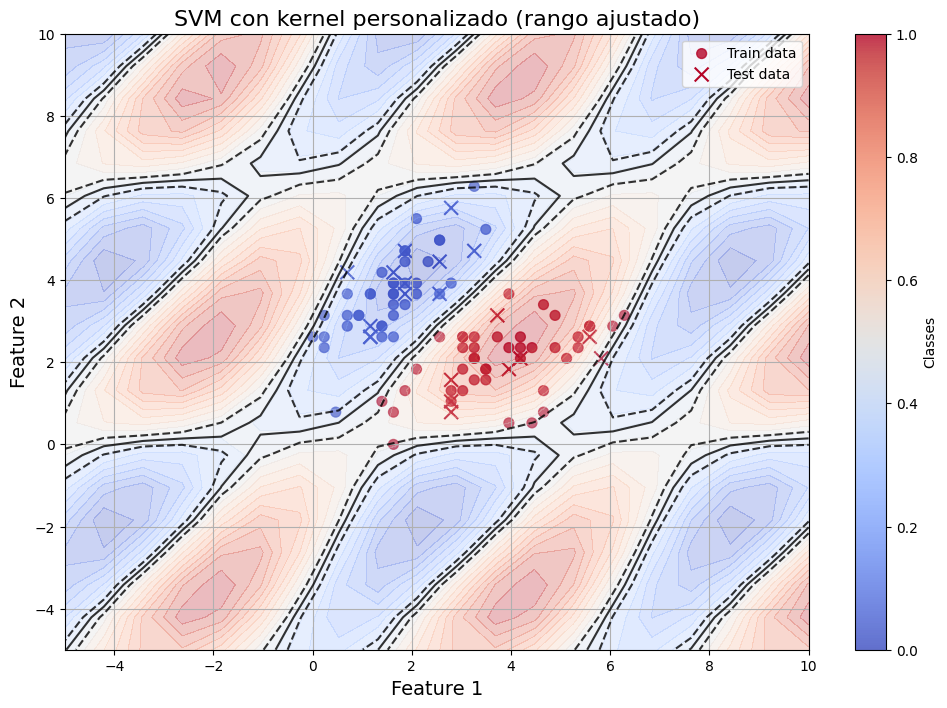

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
from qiskit import QuantumCircuit

def quantum_distance_calculation(x, y):
    # Determinar el número de qubits necesario a partir de la longitud de x
    num_qubits = len(x)
    
    # Crear un circuito cuántico con num_qubits qubits
    qc = QuantumCircuit(num_qubits)
    
    # Aplicar Hadamard a cada qubit
    for i in range(num_qubits):
        qc.h(i)  # Aplicar Hadamard al qubit i
        
    # Aplicar puertas CNOT entre pares de qubits adyacentes (de izquierda a derecha)
    for i in range(num_qubits - 1):
        qc.cx(i, i + 1)  # Aplicar una puerta CNOT entre el qubit i y el qubit i+1

    # Aplicar rotaciones Rz con los ángulos -y[i]
    for i in range(num_qubits):
        qc.rz(-y[i], i)  # Aplicar una rotación Rz al qubit i con el ángulo -y[i]
        
    # Aplicar rotaciones Rz con los ángulos x[i]
    for i in range(num_qubits):
        qc.rz(x[i], i)  # Aplicar una rotación Rz al qubit i con el ángulo x[i]
        
    # Aplicar puertas CNOT entre pares de qubits adyacentes (de derecha a izquierda para mantener simetría)
    for i in reversed(range(num_qubits - 1)):
        qc.cx(i, i + 1)  # Aplicar una puerta CNOT entre el qubit i y el qubit i+1 (simétrico)

    # Aplicar Hadamard a cada qubit
    for i in range(num_qubits):
        qc.h(i)  # Aplicar Hadamard al qubit i

     # Obtener el statevector después de aplicar el circuito
    statevector = Statevector.from_instruction(qc)
    
    # Calcular la probabilidad del estado |00...0> tomando el valor absoluto al cuadrado de su amplitud
    prob = np.abs(statevector[0]) ** 2
    
    return prob

def kernel_personalizado(X, Y):
    # Inicializar la matriz del kernel con el tamaño adecuado
    kernel_matrix = np.zeros((X.shape[0], Y.shape[0]))

    # Función interna para calcular una única entrada del kernel
    def calcular_elemento_kernel(i, j):
        return quantum_distance_calculation(X[i], Y[j])

    # Calcular el kernel usando paralelización
    results = Parallel(n_jobs=-1)(delayed(calcular_elemento_kernel)(i, j)
                                  for i in range(X.shape[0]) for j in range(Y.shape[0]))

    # Rellenar la matriz del kernel
    kernel_matrix = np.array(results).reshape(X.shape[0], Y.shape[0])
    return kernel_matrix

# Precomputar los kernels
kernel_pers = kernel_personalizado(X_train, X_train)
print(kernel_pers)

# Entrenar SVM con kernel personalizado precomputado
svm_personalizado = svm.SVC(kernel='precomputed', C=100)
svm_personalizado.fit(kernel_pers, y_train[:100])

def graficar_clasificacion(modelo, X, y, X_test, y_test, titulo, kernel_fn):
    plt.figure(figsize=(12, 8))

    # Graficar puntos de entrenamiento
    scatter_train = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, label='Train data', alpha=0.8)

    # Graficar puntos de prueba con marcadores distintos (x) y colores diferentes
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=100, marker='x', label='Test data')

    # Especificar límites de los ejes X e Y
    x_min, x_max = -5, 10
    y_min, y_max = -5, 10

    # Crear una malla para el contorno de decisión
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 20), np.linspace(y_min, y_max, 20))

    # Precomputar el kernel para la malla
    X_mesh = np.c_[xx.ravel(), yy.ravel()]
    kernel_mesh = kernel_fn(X_mesh, X)

    Z = modelo.decision_function(kernel_mesh)
    Z = Z.reshape(xx.shape)

    # Dibujar el contorno y los márgenes
    plt.contourf(xx, yy, Z, alpha=0.3, levels=np.linspace(Z.min(), Z.max(), 20), cmap='coolwarm')
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.8, linestyles=['--', '-', '--'])

    # Mejorar la visualización
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.colorbar(scatter_train, label='Classes')
    plt.title(titulo, fontsize=16)
    plt.xlabel('Feature 1', fontsize=14)
    plt.ylabel('Feature 2', fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

# Graficar la clasificación para el kernel personalizado con límites ajustados
graficar_clasificacion(svm_personalizado, X_train, y_train[:100], X_test, y_test[:100], "SVM con kernel personalizado (rango ajustado)", kernel_personalizado)

In [ ]:
# Precomputar los kernels para el conjunto de prueba
kernel_pers_test = kernel_personalizado(X_test, X_train)

# Hacer predicciones
predicciones = svm_personalizado.predict(kernel_pers_test)
print(predicciones)
# Calcular la precisión
precision = np.sum(predicciones == y_test) / len(predicciones)
print("Precisión del modelo:", precision)

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
Precisión del modelo: 1.0


AHORA CON PauliFeatureMap

{'00': 889, '11': 64, '10': 31, '01': 40} => 889


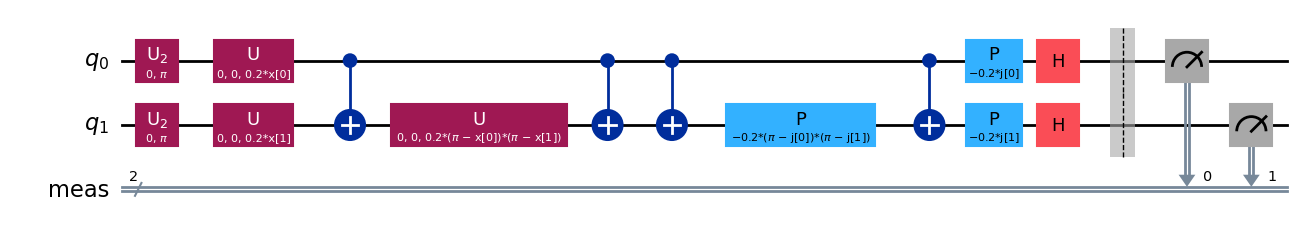

In [2]:
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 
from qiskit.circuit.library import PauliFeatureMap
 
# Bell Circuit
qc = PauliFeatureMap(
    alpha=0.2,
    feature_dimension=2,          # Number of features to encode
    reps=1,                       # Number of times to repeat the encoding
    paulis=['Z', 'ZZ'],                  # Using only Z rotations in this example
)

inv_qc = PauliFeatureMap(
    alpha=0.2,
    feature_dimension=2,          # Number of features to encode
    reps=1,                       # Number of times to repeat the encoding
    paulis=['Z', 'ZZ'],                  # Using only Z rotations in this example
    parameter_prefix='j'
).inverse()

qc.append(inv_qc, [0, 1])
qc.measure_all()
# qc = qc.assign_parameters([0.1, 0.3, 1, 2])

 
# Run the sampler job locally using AerSimulator.
# Session syntax is supported but ignored because local mode doesn't support sessions.
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(qc)
with Session(backend=aer_sim) as session:
    sampler = SamplerV2(mode=session)
    result = sampler.run([(isa_qc, np.array([1, 2, 3, 4]))]).result()

print(result[0].data.meas.get_counts(), "=>", result[0].data.meas.get_counts()['00'])
qc.decompose().decompose().draw('mpl')

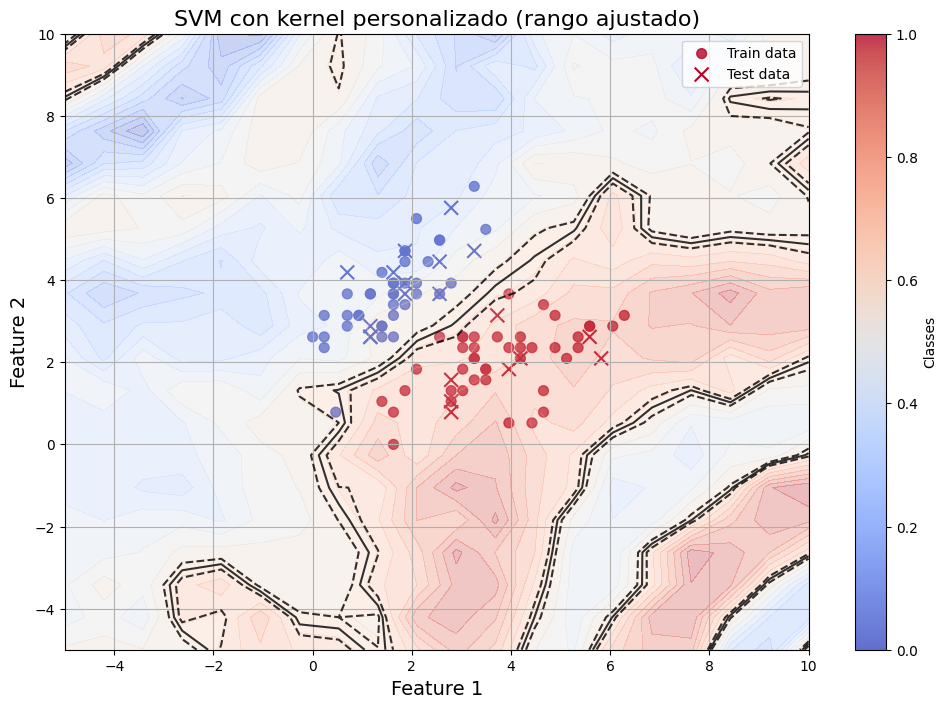

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
# from qiskit.circuit import QuantumCircuit, Parameter
from qiskit_ibm_runtime import Session, SamplerV2 
 
def create_quantum_circuit(n_features, alpha, reps):
    # Bell Circuit
    qc = PauliFeatureMap(
        alpha=alpha,
        feature_dimension=n_features,          # Number of features to encode
        reps=reps,                       # Number of times to repeat the encoding
        paulis=['Z', 'ZZ'],                  # Using only Z rotations in this example
    )

    inv_qc = PauliFeatureMap(
        alpha=alpha,
        feature_dimension=n_features,          # Number of features to encode
        reps=reps,                       # Number of times to repeat the encoding
        paulis=['Z', 'ZZ'],                  # Using only Z rotations in this example
        parameter_prefix='j'
    ).inverse()

    qc.append(inv_qc, list(range(n_features)))
    qc.measure_all()

    aer_sim = AerSimulator()
    pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
    isa_qc = pm.run(qc)
    
    return isa_qc

import numpy as np

def kernel_personalizado_train(X, Y):
    # Inicializar la matriz del kernel
    kernel_matrix = np.zeros((X.shape[0], Y.shape[0]))
    circuit = create_quantum_circuit(X.shape[1], 0.2, 1)
    aer_sim = AerSimulator()
    with Session(backend=aer_sim) as session:
        sampler = SamplerV2(mode=session)
        for i in range(X.shape[0]):
            for j in range(i, Y.shape[0]):  # Solo calcula la mitad superior
                params = list(X[i]) + list(Y[j])
                result = sampler.run([(circuit, np.array(params))]).result()
                
                # Obtener el conteo de resultados de medición
                counts = result[0].data.meas.get_counts()
                
                # Calcular la probabilidad del estado |00...0>
                state_key = '0' * X.shape[1]  # Estado objetivo
                prob = counts.get(state_key, 0) / sum(counts.values())  # Probabilidad del estado objetivo
                
                # Guardar el valor en la posición (i, j)
                kernel_matrix[i, j] = prob
                kernel_matrix[j, i] = prob  # Refleja el valor en la posición simétrica (j, i)
    return kernel_matrix
# Precomputar los kernels
kernel_pers = kernel_personalizado_train(X_train, X_train)
# print(kernel_pers)

def kernel_personalizado_test(X, Y):
    # Inicializar la matriz del kernel
    kernel_matrix = np.zeros((X.shape[0], Y.shape[0]))
    circuit = create_quantum_circuit(X.shape[1], 0.2, 1)
    aer_sim = AerSimulator()
    with Session(backend=aer_sim) as session:
        sampler = SamplerV2(mode=session)
        for i in range(X.shape[0]):
            for j in range(Y.shape[0]):
                params = list(X[i]) + list(Y[j])
                result = sampler.run([(circuit, np.array(params))]).result()
                # Obtener el conteo de resultados de medición
                counts = result[0].data.meas.get_counts()
                # Calcular la probabilidad del estado |00...0>
                state_key = '0' * X.shape[1]  # Estado objetivo
                prob = counts.get(state_key, 0) / sum(counts.values())  # Probabilidad del estado objetivo
                # Calcular el producto interno entre las transformaciones de x e y
                kernel_matrix[i, j] = prob
    return kernel_matrix

# Entrenar SVM con kernel personalizado precomputado
svm_personalizado = svm.SVC(kernel='precomputed', C=100)
svm_personalizado.fit(kernel_pers, y_train[:100])

def graficar_clasificacion(modelo, X, y, X_test, y_test, titulo, kernel_fn):
    plt.figure(figsize=(12, 8))

    # Graficar puntos de entrenamiento
    scatter_train = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, label='Train data', alpha=0.8)

    # Graficar puntos de prueba con marcadores distintos (x) y colores diferentes
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=100, marker='x', label='Test data')

    # Especificar límites de los ejes X e Y
    x_min, x_max = -5, 10
    y_min, y_max = -5, 10

    # Crear una malla para el contorno de decisión
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 20), np.linspace(y_min, y_max, 20))

    # Precomputar el kernel para la malla
    X_mesh = np.c_[xx.ravel(), yy.ravel()]
    kernel_mesh = kernel_fn(X_mesh, X)

    Z = modelo.decision_function(kernel_mesh)
    Z = Z.reshape(xx.shape)

    # Dibujar el contorno y los márgenes
    plt.contourf(xx, yy, Z, alpha=0.3, levels=np.linspace(Z.min(), Z.max(), 20), cmap='coolwarm')
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.8, linestyles=['--', '-', '--'])

    # Mejorar la visualización
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.colorbar(scatter_train, label='Classes')
    plt.title(titulo, fontsize=16)
    plt.xlabel('Feature 1', fontsize=14)
    plt.ylabel('Feature 2', fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

# Graficar la clasificación para el kernel personalizado con límites ajustados
graficar_clasificacion(svm_personalizado, X_train, y_train[:100], X_test, y_test[:100], "SVM con kernel personalizado (rango ajustado)", kernel_personalizado_test)

In [4]:
# Precomputar los kernels para el conjunto de prueba
kernel_pers_test = kernel_personalizado_test(X_test, X_train)

# Hacer predicciones
predicciones = svm_personalizado.predict(kernel_pers_test)
print(predicciones)
# Calcular la precisión
precision = np.sum(predicciones == y_test) / len(predicciones)
print("Precisión del modelo:", precision)

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
Precisión del modelo: 1.0


jugar con el numero de shots!!

AHORA CON LAS 4 COORDENADAS PERO SIN VISUALIZACIÓN:

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()

# Convertir a DataFrame para mayor flexibilidad
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Eliminar una de las clases (por ejemplo, la clase con target == 2)
df = df[df['target'] != 2]

# Separar características (X) y etiquetas (y)
X = df.drop('target', axis=1)
y = df['target']

# Dividir en conjuntos de entrenamiento y prueba (80% para entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 2 * np.pi))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Imprimir la forma de los conjuntos
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')
print(f'Tamaño de las etiquetas de entrenamiento: {y_train.shape}')
print(f'Tamaño de las etiquetas de prueba: {y_test.shape}')

Tamaño del conjunto de entrenamiento: (80, 4)
Tamaño del conjunto de prueba: (20, 4)
Tamaño de las etiquetas de entrenamiento: (80,)
Tamaño de las etiquetas de prueba: (20,)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit_ibm_runtime import Session, SamplerV2 
 
def create_quantum_circuit(n_features, alpha, reps):
    # Bell Circuit
    qc = PauliFeatureMap(
        alpha=alpha,
        feature_dimension=n_features,          # Number of features to encode
        reps=reps,                       # Number of times to repeat the encoding
        paulis=['Z', 'ZZ'],                  # Using only Z rotations in this example
    )

    inv_qc = PauliFeatureMap(
        alpha=alpha,
        feature_dimension=n_features,          # Number of features to encode
        reps=reps,                       # Number of times to repeat the encoding
        paulis=['Z', 'ZZ'],                  # Using only Z rotations in this example
        parameter_prefix='j'
    ).inverse()

    qc.append(inv_qc, list(range(n_features)))
    qc.measure_all()

    aer_sim = AerSimulator()
    pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
    isa_qc = pm.run(qc)
    
    return isa_qc

import numpy as np

def kernel_personalizado_train(X, Y):
    # Inicializar la matriz del kernel
    kernel_matrix = np.zeros((X.shape[0], Y.shape[0]))
    circuit = create_quantum_circuit(X.shape[1], 0.2, 1)
    aer_sim = AerSimulator()
    with Session(backend=aer_sim) as session:
        sampler = SamplerV2(mode=session)
        for i in range(X.shape[0]):
            for j in range(i, Y.shape[0]):  # Solo calcula la mitad superior
                params = list(X[i]) + list(Y[j])
                result = sampler.run([(circuit, np.array(params))]).result()
                
                # Obtener el conteo de resultados de medición
                counts = result[0].data.meas.get_counts()
                
                # Calcular la probabilidad del estado |00...0>
                state_key = '0' * X.shape[1]  # Estado objetivo
                prob = counts.get(state_key, 0) / sum(counts.values())  # Probabilidad del estado objetivo
                
                # Guardar el valor en la posición (i, j)
                kernel_matrix[i, j] = prob
                kernel_matrix[j, i] = prob  # Refleja el valor en la posición simétrica (j, i)
    return kernel_matrix

# Precomputar los kernels
kernel_pers = kernel_personalizado_train(X_train, X_train)
# print(kernel_pers)

# Entrenar SVM con kernel personalizado precomputado
svm_personalizado = svm.SVC(kernel='precomputed', C=100)
svm_personalizado.fit(kernel_pers, y_train[:100])

SVC(C=100, kernel='precomputed')

In [7]:
def kernel_personalizado_test(X, Y):
    # Inicializar la matriz del kernel
    kernel_matrix = np.zeros((X.shape[0], Y.shape[0]))
    circuit = create_quantum_circuit(X.shape[1], 0.2, 1)
    aer_sim = AerSimulator()
    with Session(backend=aer_sim) as session:
        sampler = SamplerV2(mode=session)
        for i in range(X.shape[0]):
            for j in range(Y.shape[0]):
                params = list(X[i]) + list(Y[j])
                result = sampler.run([(circuit, np.array(params))]).result()
                # Obtener el conteo de resultados de medición
                counts = result[0].data.meas.get_counts()
                # Calcular la probabilidad del estado |00...0>
                state_key = '0' * X.shape[1]  # Estado objetivo
                prob = counts.get(state_key, 0) / sum(counts.values())  # Probabilidad del estado objetivo
                # Calcular el producto interno entre las transformaciones de x e y
                kernel_matrix[i, j] = prob
    return kernel_matrix

# Precomputar los kernels para el conjunto de prueba
kernel_pers_test = kernel_personalizado_test(X_test, X_train)

# Hacer predicciones
predicciones = svm_personalizado.predict(kernel_pers_test)
print(predicciones)
# Calcular la precisión
precision = np.sum(predicciones == y_test) / len(predicciones)
print("Precisión del modelo:", precision)

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
Precisión del modelo: 1.0
